## Stock Sentiment Analysis using News Headlines

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv(r'Data.csv', encoding = "ISO-8859-1")

In [6]:
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [7]:
#if label is 1 it means stock price will increase with respect to particular headlines,if 0 it means it will either constant or decrease

In [8]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [9]:
data=train.iloc[:,2:27]

In [10]:
data.columns

Index(['Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9',
       'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17',
       'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25'],
      dtype='object')

In [11]:
# Removing punctuations
#apart from a-z ,remove all by blank 
data.replace("[^a-zA-Z]"," ", inplace=True)

In [12]:
data.head()

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [13]:
# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
new_Index

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [14]:
data.columns= new_Index
data.head(5)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [15]:
data.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            3965, 3966, 3967, 3968, 3969, 3970, 3971, 3972, 3973, 3974],
           dtype='int64', length=3975)

In [16]:
len(data)

3975

In [17]:
### accessing data of 1st column
data['0']

0       A 'hindrance to operations': extracts from the...
1                                               Scorecard
2                       Coventry caught on counter by Flo
3                           Pilgrim knows how to progress
4                                    Hitches and Horlocks
                              ...                        
3970    Brazil declares emergency after 2,400 babies a...
3971    Germany recruits 8,500 teachers to teach Germa...
3972    Pentagon thwarts Obama's effort to close Guant...
3973    Tech companies face criminal charges if they n...
3974    Microsoft Corp said on Wednesday it will begin...
Name: 0, Length: 3975, dtype: object

In [18]:
# Convertng headlines to lower case
#why str.lower on 0,1,2---- bcz we can apply function on a column only
for index in new_Index:
    data[index]=data[index].str.lower()
data.head(1)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title


In [19]:
##print entire data of 2nd row
data.iloc[1,0:25]

0                                             scorecard
1                                   the best lake scene
2                         leader: german sleaze inquiry
3                                         cheerio, boyo
4                              the main recommendations
5                                has cubie killed fees?
6                                has cubie killed fees?
7                                has cubie killed fees?
8     hopkins 'furious' at foster's lack of hannibal...
9                                has cubie killed fees?
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows, eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

In [20]:
#create a list of all headlines for row 2,as 25 headlines in row 2
' '.join([str(x) for x in data.iloc[1,0:25]])

"scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main recommendations has cubie killed fees? has cubie killed fees? has cubie killed fees? hopkins 'furious' at foster's lack of hannibal appetite has cubie killed fees? a tale of two tails i say what i like and i like what i say elbows, eyes and nipples task force to assess risk of asteroid collision how i found myself at last on the critical list the timing of their lives dear doctor irish court halts ira man's extradition to northern ireland burundi peace initiative fades after rebels reject mandela as mediator pe points the way forward to the ecb campaigners keep up pressure on nazi war crimes suspect jane ratcliffe yet more things you wouldn't know without the movies millennium bug fails to bite"

In [21]:
## create a list headlines to insert all the headlines of all rows
headlines=[]
for row in range(0,len(data)):
    headlines.append(' '.join([str(i) for i in data.iloc[row,0:25]]))

In [22]:
headlines[0:3]

["a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title",
 "scorecard the best lake scene leader: german sleaze inquiry cheerio, boyo the main

#### Implement Bag of Words

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

In [24]:
## implement BAG OF WORDS
cv=CountVectorizer(ngram_range=(2,2))
traindata_x=cv.fit_transform(headlines)

In [25]:
# implement RandomForest Classifier,almost takes 2 mins
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))


In [27]:
test_data = cv.transform(test_transform)


In [28]:
randomclassifier.fit(traindata_x,train['Label'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
predictions = randomclassifier.predict(test_data)

### plot_confusion_matrix

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues, labels=["positive", "negative"]):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

[[141  45]
 [ 10 182]]


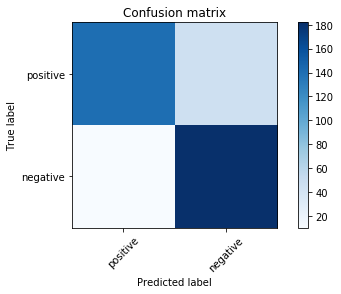

In [33]:
plt.figure()
cm=confusion_matrix(test['Label'],predictions)
print(cm)
plot_confusion_matrix(cm)    
plt.show()

In [34]:
## Import library to check accuracy
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [35]:
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.8544973544973545
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       186
           1       0.80      0.95      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.87      0.85      0.85       378



### Implement MultinomialNB

In [36]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindata_x,train['Label'])

predictions = nb.predict(test_data)
matrix=confusion_matrix(test['Label'],predictions)
print(matrix)
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

[[137  49]
 [  9 183]]
0.8465608465608465
              precision    recall  f1-score   support

           0       0.94      0.74      0.83       186
           1       0.79      0.95      0.86       192

    accuracy                           0.85       378
   macro avg       0.86      0.84      0.84       378
weighted avg       0.86      0.85      0.84       378



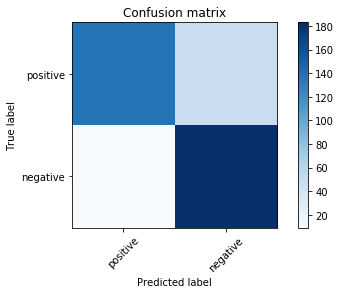

In [37]:
plot_confusion_matrix(matrix)